## Paquetes necesarios

Deben instalarse los paquetes: 
* pandas
* matplotlib
* statsmodels
* seaborn
* scikit-learn

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Cargar el paquete Yahoo Finance

In [2]:
!pip install yfinance

In [3]:
def preprocessing_yf(symbol):
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Eliminar la columna adj close
  del df["adj close"]

  return df

In [4]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Descarga la serie de tiempo de la accción de Amazon

In [5]:
df = preprocessing_yf("AMZN")

[*********************100%***********************]  1 of 1 completed


In [6]:
df=df.asfreq('b') #bussiness day
df=df.fillna(method='ffill')

In [7]:
df.head()

,open,high,low,close,volume
time,,,,,
1997-05-15 00:00:00+00:00,0.097917,0.097917,0.125000,0.096354,1.443120e+09
1997-05-16 00:00:00+00:00,0.086458,0.086458,0.098958,0.085417,2.940000e+08
1997-05-19 00:00:00+00:00,0.085417,0.085417,0.088542,0.081250,1.221360e+08
1997-05-20 00:00:00+00:00,0.081771,0.081771,0.087500,0.081771,1.093440e+08
1997-05-21 00:00:00+00:00,0.071354,0.071354,0.082292,0.068750,3.770640e+08


In [8]:
df.tail()

,open,high,low,close,volume
time,,,,,
2024-10-18 00:00:00+00:00,188.990005,188.990005,190.740005,186.279999,37417700.0
2024-10-21 00:00:00+00:00,189.070007,189.070007,189.460007,186.399994,24639400.0
2024-10-22 00:00:00+00:00,189.699997,189.699997,191.520004,186.979996,29650600.0
2024-10-23 00:00:00+00:00,184.710007,184.710007,189.160004,183.690002,31733200.0
2024-10-24 00:00:00+00:00,186.619995,186.619995,187.110001,183.865005,14965517.0


In [9]:
df.describe()

,open,high,low,close,volume
count,7161.000000,7161.000000,7161.000000,7161.000000,7.161000e+03
mean,38.591195,38.591195,39.049638,38.109012,1.361359e+08
std,55.123169,55.123169,55.763081,54.465037,1.367835e+08
min,0.069792,0.069792,0.072396,0.065625,9.744000e+06
25%,2.088500,2.088500,2.131500,2.050000,6.362400e+07
50%,8.860000,8.860000,8.937500,8.728000,1.007520e+08
75%,58.713001,58.713001,58.982498,58.375000,1.555880e+08
max,200.000000,200.000000,201.199997,199.050003,2.086584e+09


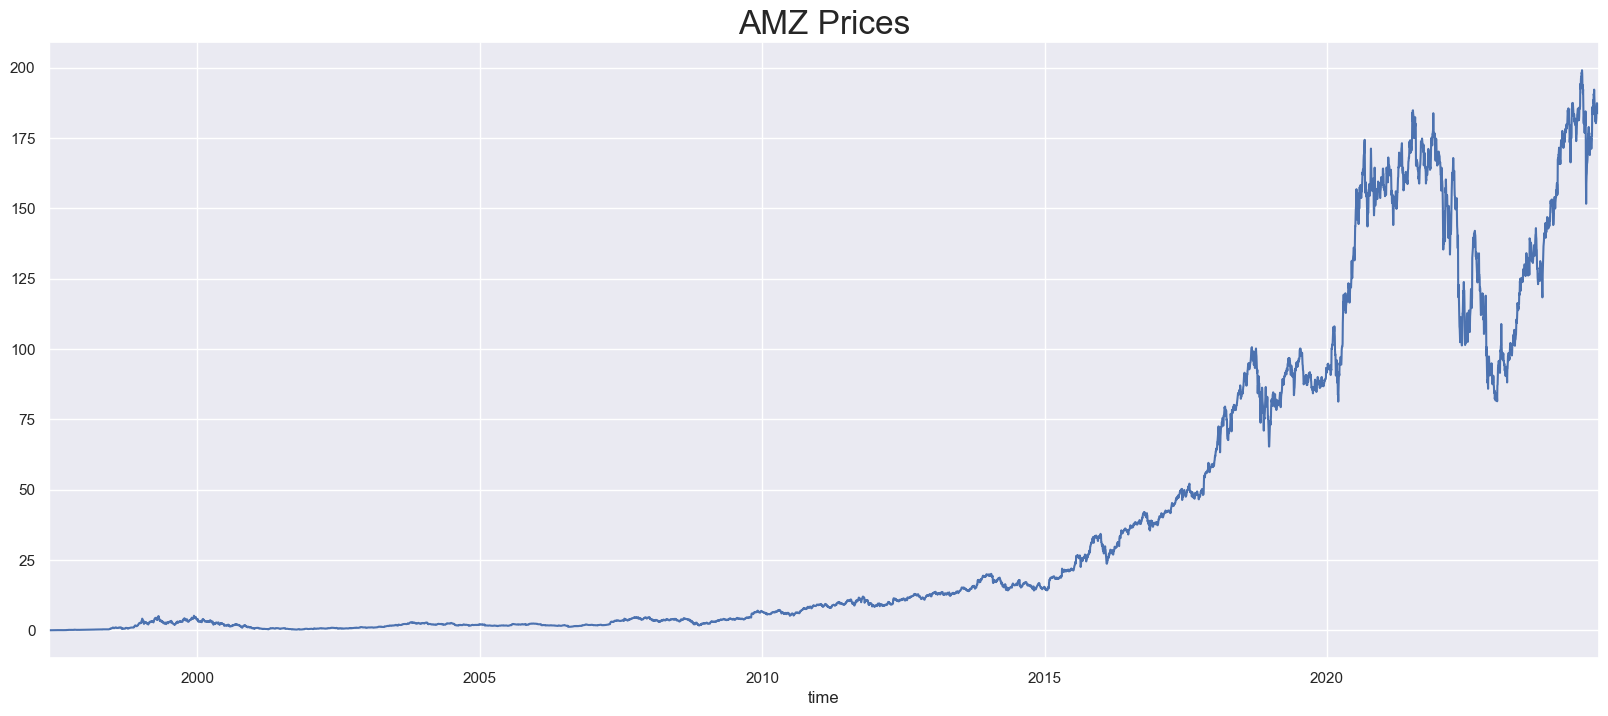

In [10]:
df.close.plot(figsize=(20,8))
plt.title("AMZ Prices", size = 24)
#plt.ylim(0,2300)
plt.show()

<Axes: xlabel='time'>

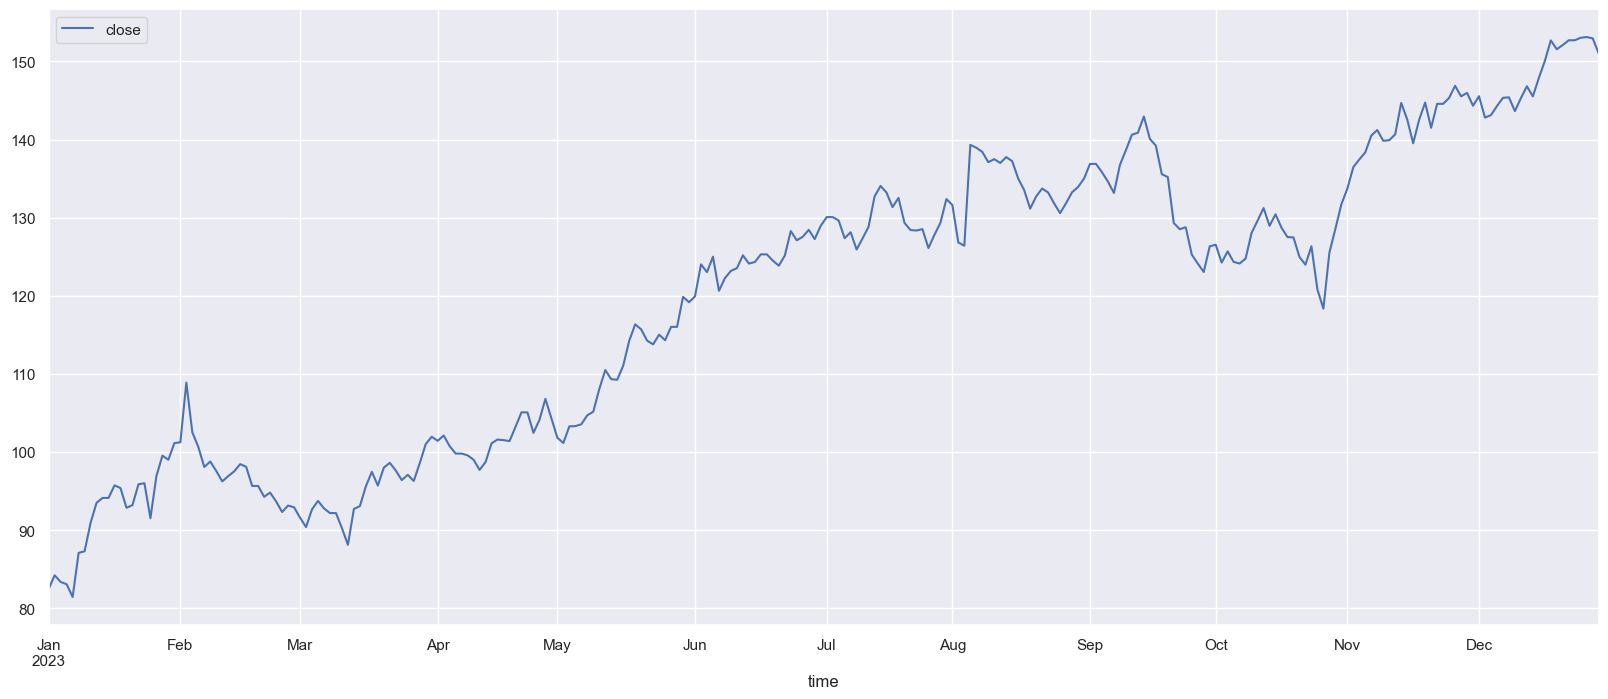

In [11]:
df[["close"]].loc["2023"].plot(figsize=(20,8))

## Prueba de estacionalidad de la serie de tiempo

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

Se calcula un estadístico de prueba ($\lambda_0$), que también se llama estadístico de constraste.

Este estadístico de prueba se compara con un valor crítico de la prueva ($\lambda_{critico}$).

Si $(\lambda_0 < \lambda_{critico})$ se rechaza $H_0$. Por tanto, la serie es estacionaria.

Otra forma es calculando el $p_{valor}$ con el cual se obtiene evidencia a favor de la hipótesis nula.

Si el $p_{valor}$ es cercano a cero, la probabilidad de aceptar la hipótesis nula es pequeña.

$\alpha =$ nivel de significancia.

$1 - \alpha =$ nivel de confianza.

$H_0: $ La series no es estacionaria.

Si $p_{valor} < \alpha $ se rechaza $H_0$. Por tanto, la serie es estacionaria.

In [12]:
vL = sts.adfuller(df.close)
vL

(1.024682808149652,
 0.9945196728966047,
 35,
 7125,
 {'1%': -3.4312681273676526,
  '5%': -2.861945739653942,
  '10%': -2.5669859711221914},
 23568.83453693903)

In [13]:
print(f'El estadístico de prueba es : {vL[0]}') # Estadístico de prueba

El estadístico de prueba es : 1.024682808149652


In [14]:
print(f'El pvalor es : {vL[1]}')

El pvalor es : 0.9945196728966047


In [15]:
print(f'El período de tiempo en que se detecta autocorrelación es : {vL[2]}')

El período de tiempo en que se detecta autocorrelación es : 35


In [16]:
print(f'La cantidad de datos en la serie de tiempos es : {vL[3]}')

La cantidad de datos en la serie de tiempos es : 7125


In [17]:
print(f'Los valores críticos para cada nivel de significancia son : {vL[4]}')

Los valores críticos para cada nivel de significancia son : {'1%': -3.4312681273676526, '5%': -2.861945739653942, '10%': -2.5669859711221914}


In [18]:
print(f'El criterio de información maximizado es : {vL[5]}')

El criterio de información maximizado es : 23568.83453693903


Para un nivel de confianza del 95%, la serie no es estacionaria

La $H_0: $ no debe ser rechazada.

La serie NO es estacionaria

In [19]:
sts.adfuller(df[["close"]].loc["2023"])

(-1.2162250875669673,
 0.66657743642051,
 0,
 259,
 {'1%': -3.4558530692911504,
  '5%': -2.872764881778665,
  '10%': -2.572751643088207},
 1066.3996631946254)

## Descomposición de la serie en componentes

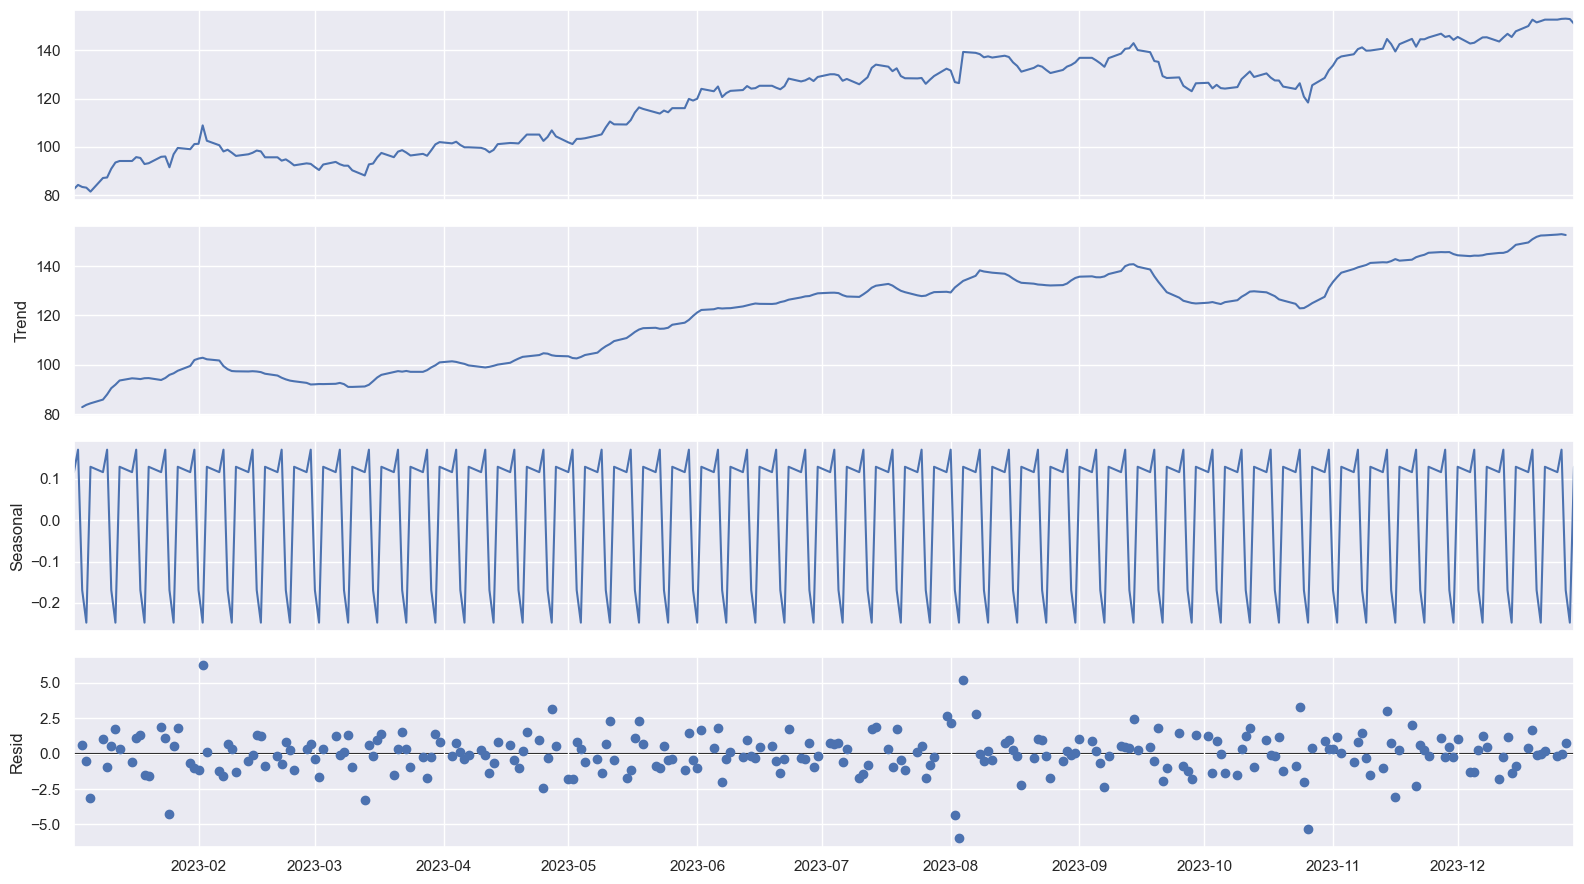

In [20]:
s_dec_additive = seasonal_decompose(df[["close"]].loc["2023"], model = "additive")
fig = s_dec_additive.plot();
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Caminata aleatoria

In [21]:
steps = np.random.normal(loc=0, scale=1, size=len(df[["close"]].loc["2023"]))

In [22]:
steps.shape

(260,)

In [23]:
P = 100 + np.cumsum(steps)

In [24]:
P = pd.DataFrame(P)

In [25]:
P.index =df[["close"]].loc["2023"].index

In [26]:
P.columns = ["Caminata Aleatoria"]

In [27]:
P

,Caminata Aleatoria
time,
2023-01-02 00:00:00+00:00,99.739567
2023-01-03 00:00:00+00:00,100.116325
2023-01-04 00:00:00+00:00,100.919260
2023-01-05 00:00:00+00:00,102.067248
2023-01-06 00:00:00+00:00,101.673327
...,...
2023-12-25 00:00:00+00:00,70.821581
2023-12-26 00:00:00+00:00,70.140523
2023-12-27 00:00:00+00:00,70.434433


<Axes: xlabel='time'>

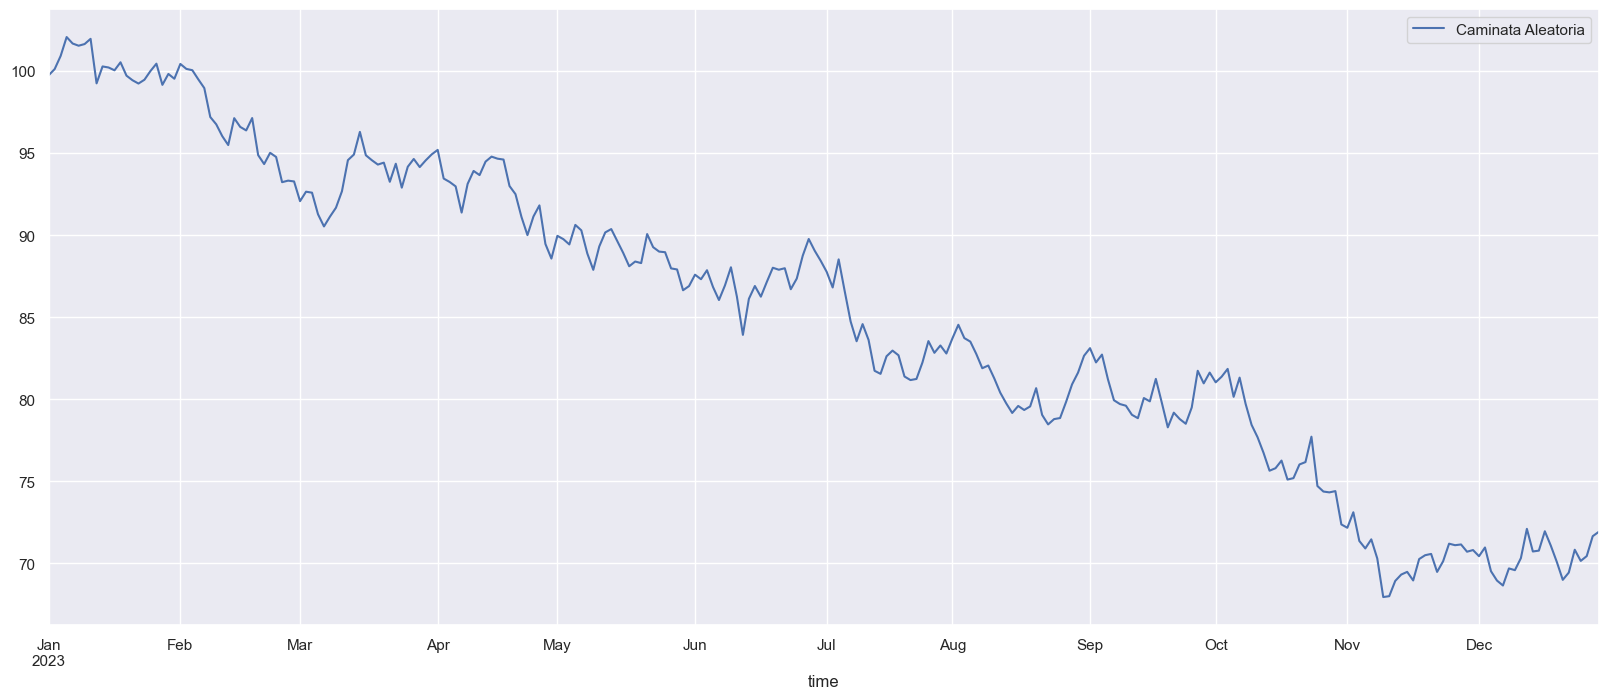

In [28]:
P.plot(figsize=(20,8))

In [29]:
P["Serie"] = df[["close"]].loc["2023"]

In [30]:
P["Ruido Blanco"] = steps

In [31]:
P.head()

,Caminata Aleatoria,Serie,Ruido Blanco
time,,,
2023-01-02 00:00:00+00:00,99.739567,82.470001,-0.260433
2023-01-03 00:00:00+00:00,100.116325,84.209999,0.376757
2023-01-04 00:00:00+00:00,100.919260,83.360001,0.802936
2023-01-05 00:00:00+00:00,102.067248,83.070000,1.147988
2023-01-06 00:00:00+00:00,101.673327,81.430000,-0.393920


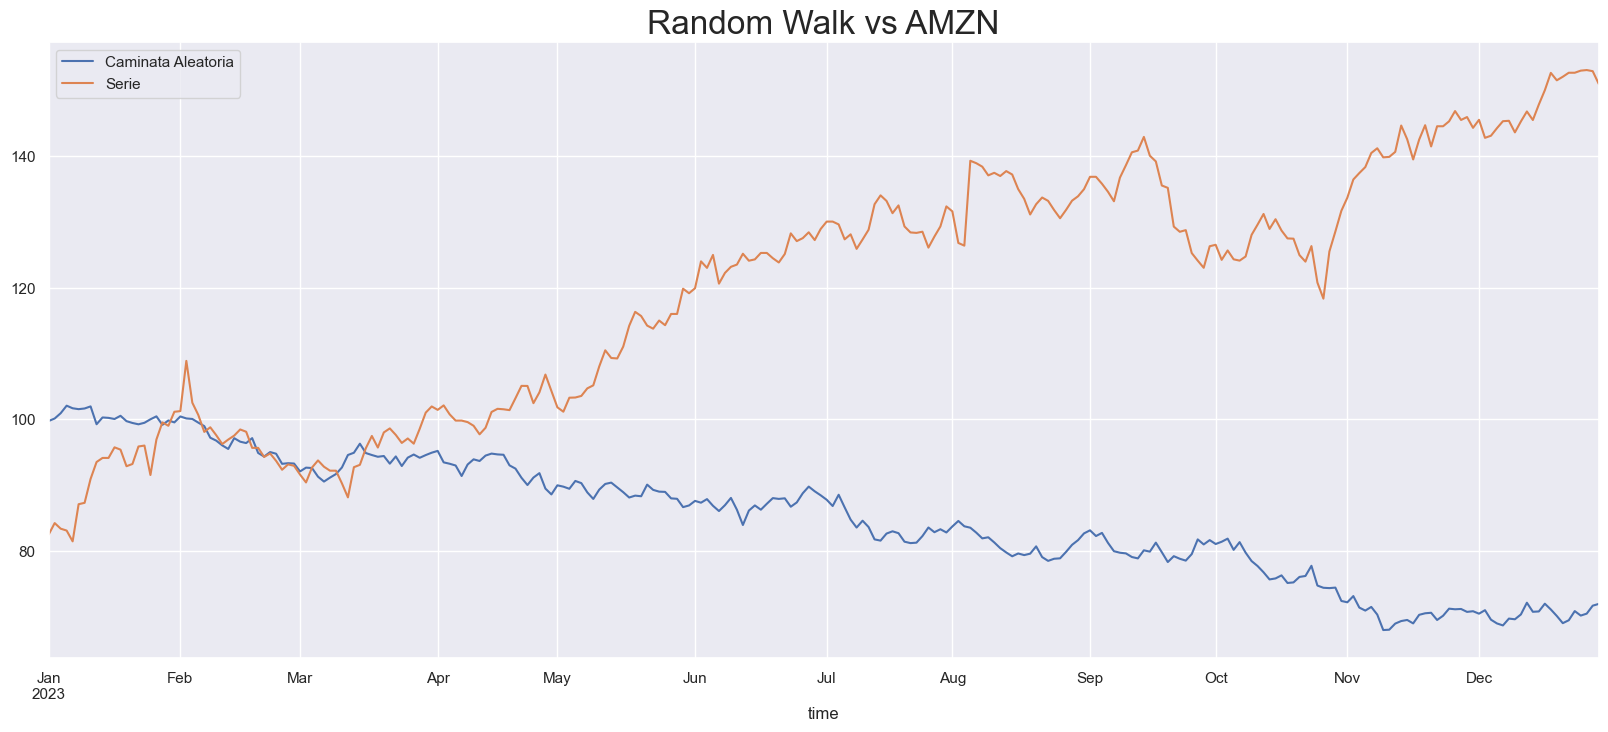

In [32]:
P["Caminata Aleatoria"].plot(figsize = (20,8))
P["Serie"].plot()
plt.title("Random Walk vs AMZN", size = 24)
plt.legend() 
plt.show()

## Función de autocorrelación ACF

https://otexts.com/fpp2/autocorrelation.html

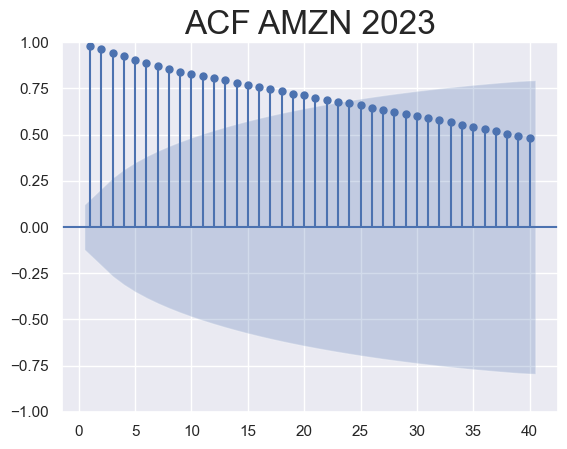

In [33]:
sgt.plot_acf(P["Serie"], lags = 40, zero = False)
plt.title("ACF AMZN 2023", size = 24)
plt.show()

In [ ]:
sgt.plot_acf(P["Caminata Aleatoria"], lags = 40, zero = False)
plt.title("ACF Caminata Aleatoria", size = 24)
plt.show()

In [ ]:
sgt.plot_acf(P["Ruido Blanco"], lags = 40, zero = False)
plt.title("ACF Ruido Blanco", size = 24)
plt.show()

## Función de autocorrelación parcial PACF

https://en.wikipedia.org/wiki/Partial_autocorrelation_function

### La autocorrelación parcial de un modelo AR( p ) es distinta de cero para rezagos menores o iguales a p y 0 para rezagos mayores que p .

In [ ]:
sgt.plot_pacf(P["Serie"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF AMZN 2023", size = 24)
plt.show()

In [ ]:
sgt.plot_pacf(P["Caminata Aleatoria"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Caminata Aleatoria", size = 24)
plt.show()

In [ ]:
sgt.plot_pacf(P["Ruido Blanco"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Ruido Blanco", size = 24)
plt.show()

## Ejemplo de data AR(1)

In [ ]:
# generate random Gaussian values
from numpy.random import seed
from numpy.random import randn

In [ ]:
seed(145)
values = randn(100)
values

In [ ]:
Lista = []
x = 1
Lista.append(x)
for i in range(100):
    x = 0.6*x + 0.1*values[i]
    Lista.append(x)
Lista

In [ ]:
pd.DataFrame(Lista).plot(figsize = (20,8))

In [ ]:
vL = sts.adfuller(Lista)
vL

In [ ]:
sgt.plot_pacf(Lista, lags = 20, zero = False, method = ('ols'))
plt.title("PACF Lista", size = 24)
plt.show()

In [ ]:
df = pd.DataFrame(Lista)
df.columns = ["Serie"]
df.index.name = "Tiempo"
df

In [ ]:
df['Serie_1'] = df['Serie'].shift(1)
df.head(3)

In [ ]:
df.dropna(inplace = True)
df.head(3)

In [ ]:
X = df.Serie_1.values
y = df.Serie.values


In [ ]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
lr1 = LinearRegression()
model = lr1.fit(X_train, y_train)

In [ ]:
lr1.intercept_

In [ ]:
lr1.coef_

In [ ]:
y1_pred = lr1.predict(X_test)

In [ ]:
plt.plot(y_test[-15:], label="Actual Values", color = 'Green', marker = 'o')
plt.plot(y1_pred[-15:], label="Predicted Values", color = 'Red', marker = 'x')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y1_pred))

In [ ]:
plt.plot(y_test- y1_pred, label="Residuos", color = 'Green', marker = 'o')
plt.legend()
plt.show()

In [ ]:
sgt.plot_pacf(y_test- y1_pred, lags = 10, zero = False, method = ('ols'))
plt.title("PACF Residuos", size = 24)
plt.show()

In [ ]:
vL = sts.adfuller(y_test- y1_pred)
vL

In [ ]:
sgt.plot_pacf(y_test- y1_pred, lags = 10, zero = False)
plt.title("ACF Residuos", size = 24)
plt.show()